In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
match_path= "Resources/Matches_Results.csv"
odds_path= "Resources/Matches_Odds.csv"

In [3]:
matches=pd.read_csv(match_path)
odds=pd.read_csv(odds_path)

In [4]:
matches.head(10)

,match_id,date_start,competition_name,home_team_name,away_team_name,home_team_score,away_team_score,final_result
0,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x
1,2,12/26/2016 15:00,Eng. Premier League,Burnley,Middlesbrough,1,0,1
2,3,12/26/2016 15:00,Eng. Premier League,Manchester United,Sunderland,3,1,1
3,4,12/26/2016 15:00,Eng. Premier League,Swansea,West Ham,1,4,2
4,5,12/26/2016 15:00,Eng. Premier League,Arsenal,West Bromwich Albion,1,0,1
5,6,12/26/2016 15:00,Eng. Premier League,Leicester,Everton,0,2,2
6,7,12/26/2016 15:00,Eng. Premier League,Chelsea,Bournemouth,3,0,1
7,8,12/26/2016 17:15,Eng. Premier League,Hull,Manchester City,0,3,2
8,9,12/27/2016 17:15,Eng. Premier League,Liverpool,Stoke,4,1,1
9,10,12/28/2016 19:44,Eng. Premier League,Southampton,Tottenham,1,4,2


In [5]:
merged_df=pd.merge(matches, odds, on=["match_id"])

In [6]:
merged_df

,match_id,date_start_x,competition_name_x,home_team_name_x,away_team_name_x,home_team_score,away_team_score,final_result,date_start_y,competition_name_y,date_created,home_team_name_y,away_team_name_y,home_team_odd,away_team_odd,tie_odd
0,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,12/26/2016 12:30,Eng. Premier League,12/26/2016 12:00,Watford,Crystal Palace,2.35,3.10,3.10
1,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,12/26/2016 12:30,Eng. Premier League,12/26/2016 6:45,Watford,Crystal Palace,2.40,3.00,3.25
2,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,12/26/2016 12:30,Eng. Premier League,12/26/2016 3:35,Watford,Crystal Palace,2.40,3.10,3.10
3,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,12/26/2016 12:30,Eng. Premier League,12/23/2016 19:45,Watford,Crystal Palace,2.45,2.90,3.25
4,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,12/26/2016 12:30,Eng. Premier League,12/25/2016 15:20,Watford,Crystal Palace,2.45,3.00,3.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466669,844769,5/23/2018 19:44,French Ligue 1 Playoffs,Ajaccio,Toulouse,0,3,2,5/23/2018 19:44,French Ligue 1 Playoffs,5/23/2018 18:35,Ajaccio,Toulouse,3.60,2.11,3.00
466670,844769,5/23/2018 19:44,French Ligue 1 Playoffs,Ajaccio,Toulouse,0,3,2,5/23/2018 19:44,French Ligue 1 Playoffs,5/23/2018 18:25,Ajaccio,Toulouse,3.65,2.08,3.00
466671,844769,5/23/2018 19:44,French Ligue 1 Playoffs,Ajaccio,Toulouse,0,3,2,5/23/2018 19:44,French Ligue 1 Playoffs,5/23/2018 13:35,Ajaccio,Toulouse,3.65,2.10,2.95
466672,844769,5/23/2018 19:44,French Ligue 1 Playoffs,Ajaccio,Toulouse,0,3,2,5/23/2018 19:44,French Ligue 1 Playoffs,5/23/2018 13:40,Ajaccio,Toulouse,3.75,2.05,3.00


In [7]:
merged_df=merged_df.drop(columns=["date_start_y", "home_team_name_y","away_team_name_y"])

In [8]:
merged_df

,match_id,date_start_x,competition_name_x,home_team_name_x,away_team_name_x,home_team_score,away_team_score,final_result,competition_name_y,date_created,home_team_odd,away_team_odd,tie_odd
0,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/26/2016 12:00,2.35,3.10,3.10
1,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/26/2016 6:45,2.40,3.00,3.25
2,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/26/2016 3:35,2.40,3.10,3.10
3,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/23/2016 19:45,2.45,2.90,3.25
4,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/25/2016 15:20,2.45,3.00,3.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466669,844769,5/23/2018 19:44,French Ligue 1 Playoffs,Ajaccio,Toulouse,0,3,2,French Ligue 1 Playoffs,5/23/2018 18:35,3.60,2.11,3.00
466670,844769,5/23/2018 19:44,French Ligue 1 Playoffs,Ajaccio,Toulouse,0,3,2,French Ligue 1 Playoffs,5/23/2018 18:25,3.65,2.08,3.00
466671,844769,5/23/2018 19:44,French Ligue 1 Playoffs,Ajaccio,Toulouse,0,3,2,French Ligue 1 Playoffs,5/23/2018 13:35,3.65,2.10,2.95
466672,844769,5/23/2018 19:44,French Ligue 1 Playoffs,Ajaccio,Toulouse,0,3,2,French Ligue 1 Playoffs,5/23/2018 13:40,3.75,2.05,3.00


In [9]:
#create df of each of the top five leagues

Eng_df = merged_df.loc[(
    merged_df["competition_name_x"] == 'Eng. Premier League')]
Eng_df.reset_index(inplace=True)

Ger_df = merged_df.loc[(
    merged_df["competition_name_x"] == 'German Bundesliga')]
Ger_df.reset_index(inplace=True)

Fre_df = merged_df.loc[(
    merged_df["competition_name_x"] == 'French Ligue 1')]
Fre_df.reset_index(inplace=True)

Spa_df = merged_df.loc[(
    merged_df["competition_name_x"] == 'Spanish Liga Primera')]
Spa_df.reset_index(inplace=True)

Ita_df = merged_df.loc[(
    merged_df["competition_name_x"] == 'Italian Serie A')]
Ita_df.reset_index(inplace=True)

#print(f"{len(eng_matches)}, {len(ger_matches)}, {len(fre_matches)}, {len(spa_matches)}, {len(ita_matches)}")
#print(f"{len(English)}, {len(German)}, {len(French)}, {len(Spanish)}, {len(Italian)}")
top_5_df = pd.merge(Eng_df,Ger_df, how='outer')
top_5_df = pd.merge(top_5_df,Fre_df, how='outer')
top_5_df = pd.merge(top_5_df,Spa_df, how='outer')
top_5_df = pd.merge(top_5_df,Ita_df, how='outer')

len(top_5_df)

#len() shows that we are missing some matches since the leagues played 380 matches each, except the German one with 306
#of interest would be finding out which matches are missing from dataset



28094

In [10]:
#testing the results of some simple betting strategies: always bet home, away, draw. Always bet odds moving up, or always bet odds moving down
 
Eng_data = Eng_df.loc[:,["home_team_odd","away_team_odd","tie_odd","final_result", "match_id"]]
Eng_data

,home_team_odd,away_team_odd,tie_odd,final_result,match_id
0,2.35,3.10,3.10,x,1
1,2.40,3.00,3.25,x,1
2,2.40,3.10,3.10,x,1
3,2.45,2.90,3.25,x,1
4,2.45,3.00,3.10,x,1
...,...,...,...,...,...
5547,2.65,2.65,3.15,2,793103
5548,2.65,2.65,3.20,2,793103
5549,2.65,2.70,3.10,2,793103
5550,2.70,2.60,3.15,2,793103


In [11]:
Eng_data['home return'] = np.where(Eng_data["final_result"] == '1', Eng_data['home_team_odd']-1, -1)
Eng_data['home return'].sum()

-4.990000000000123

In [12]:
Eng_data['away return'] = np.where(Eng_data["final_result"] == '2', Eng_data['away_team_odd']-1, -1)
Eng_data['away return'].sum()

#yikes

-732.1700000000002

In [13]:
Eng_data['tie return'] = np.where(Eng_data["final_result"] == 'x', Eng_data['tie_odd']-1, -1)
Eng_data['tie return'].sum()



-412.15000000000003

In [14]:
#creates list of index of the odds available at last call for betting
closing_odds = Eng_df.groupby('match_id')['index'].nsmallest(1)

#creates list of index of the odds available at first available betting opportunity
opening_odds = Eng_df.groupby('match_id')['index'].nlargest(1)

moving_odds_df = pd.merge(closing_odds, opening_odds, on=["match_id"])

df = moving_odds_df.rename(columns = {'index_x':'index'})
df.reset_index()
df.set_index('index')


,index_y
index,
0,7
8,17
18,29
30,43
44,52
...,...
445587,445595
446019,446037
450139,450170


In [15]:
Eng_closing = pd.merge(Eng_df, df, on = ["index"])
Eng_closing



,index,match_id,date_start_x,competition_name_x,home_team_name_x,away_team_name_x,home_team_score,away_team_score,final_result,competition_name_y,date_created,home_team_odd,away_team_odd,tie_odd,index_y
0,0,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/26/2016 12:00,2.35,3.10,3.10,7
1,8,2,12/26/2016 15:00,Eng. Premier League,Burnley,Middlesbrough,1,0,1,Eng. Premier League,12/26/2016 13:45,2.75,2.70,3.00,17
2,18,3,12/26/2016 15:00,Eng. Premier League,Manchester United,Sunderland,3,1,1,Eng. Premier League,12/26/2016 15:00,1.17,15.00,6.75,29
3,30,4,12/26/2016 15:00,Eng. Premier League,Swansea,West Ham,1,4,2,Eng. Premier League,12/26/2016 8:45,2.20,3.10,3.40,43
4,44,5,12/26/2016 15:00,Eng. Premier League,Arsenal,West Bromwich Albion,1,0,1,Eng. Premier League,12/25/2016 13:15,1.28,10.00,5.10,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,445587,779262,4/14/2018 15:00,Eng. Premier League,Huddersfield,Watford,1,0,1,Eng. Premier League,4/14/2018 9:40,2.50,2.85,3.10,445595
271,446019,779822,4/14/2018 19:44,Eng. Premier League,Tottenham,Manchester City,1,3,2,Eng. Premier League,4/9/2018 6:45,2.40,2.70,3.50,446037
272,450139,785885,4/21/2018 15:00,Eng. Premier League,Watford,Crystal Palace,0,0,x,Eng. Premier League,4/7/2018 16:05,2.35,3.00,3.20,450170
273,457004,793088,5/5/2018 17:29,Eng. Premier League,Everton,Southampton,1,1,x,Eng. Premier League,4/22/2018 1:25,2.10,3.50,3.20,457048


In [16]:
df2 = moving_odds_df.rename(columns = {'index_y':'index'})
df2.reset_index()
df2.set_index('index')



,index_x
index,
7,0
17,8
29,18
43,30
52,44
...,...
445595,445587
446037,446019
450170,450139


In [17]:
Eng_opening = pd.merge(Eng_df, df2, on = ["index"])
Eng_opening = Eng_opening.drop(columns = ['index_x','date_start_x','competition_name_x','home_team_name_x','away_team_name_x','home_team_score','away_team_score', 'competition_name_y','date_created'])



In [18]:
Eng_closing = pd.merge(Eng_df, df, on = ["index"])
Eng_closing = Eng_closing.drop(columns = ['index_y','date_start_x','competition_name_x','home_team_name_x','away_team_name_x','home_team_score','away_team_score', 'competition_name_y','date_created'])


Eng_moving_df = pd.merge(Eng_closing, Eng_opening, how = 'right', on='match_id')

In [19]:
#gets df of the first and last odds available and the odds of each for each match
Eng_moving_df = pd.merge(Eng_closing, Eng_opening, how = 'right', on='match_id')


In [20]:
#makes list of when the last available odds were lower than the starting odds aka, the bookies saw it as less likely to happen 
Eng_moving_df['home_odd_drop'] = np.where(Eng_moving_df["home_team_odd_x"] < Eng_moving_df["home_team_odd_y"], True, False)
Eng_moving_df['home_odd_drop'].value_counts()
 

True     272
False      3
Name: home_odd_drop, dtype: int64

In [21]:
Eng_moving_df['bet_first_home'] = np.where(Eng_moving_df["final_result_x"] == '1', Eng_moving_df['home_team_odd_y']-1, -1)
Eng_moving_df['bet_first_home'].sum()
#nice

8.200000000000003

In [22]:
#creates list of index of the odds available at last call for betting
top_5_closing_odds = top_5_df.groupby('match_id')['index'].nsmallest(1)

#creates list of index of the odds available at first available betting opportunity
top_5_opening_odds = top_5_df.groupby('match_id')['index'].nlargest(1)

top_5_moving_odds_df = pd.merge(top_5_closing_odds, top_5_opening_odds, on=["match_id"])

t5df = top_5_moving_odds_df.rename(columns = {'index_x':'index'})
t5df.reset_index()
t5df.set_index('index')

top_5_closing = pd.merge(top_5_df, t5df, on = ["index"])
#top_5_closing

t5df2 = top_5_moving_odds_df.rename(columns = {'index_y':'index'})
t5df2.reset_index()
t5df2.set_index('index')

top_5_opening = pd.merge(top_5_df, t5df2, on = ["index"])
top_5_opening

,index,match_id,date_start_x,competition_name_x,home_team_name_x,away_team_name_x,home_team_score,away_team_score,final_result,competition_name_y,date_created,home_team_odd,away_team_odd,tie_odd,index_x
0,7,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/26/2016 4:20,2.45,3.10,3.10,0
1,17,2,12/26/2016 15:00,Eng. Premier League,Burnley,Middlesbrough,1,0,1,Eng. Premier League,12/25/2016 14:40,3.00,2.60,3.10,8
2,29,3,12/26/2016 15:00,Eng. Premier League,Manchester United,Sunderland,3,1,1,Eng. Premier League,12/26/2016 10:30,1.20,14.00,6.25,18
3,43,4,12/26/2016 15:00,Eng. Premier League,Swansea,West Ham,1,4,2,Eng. Premier League,12/23/2016 16:24,2.60,2.70,3.25,30
4,52,5,12/26/2016 15:00,Eng. Premier League,Arsenal,West Bromwich Albion,1,0,1,Eng. Premier League,12/26/2016 11:10,1.33,9.50,4.80,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,455764,791654,4/29/2018 14:00,Italian Serie A,Verona,Spal,1,3,2,Italian Serie A,4/28/2018 16:10,3.40,2.15,3.05,455717
1382,460838,825158,5/13/2018 14:00,Italian Serie A,Bologna,Chievo,1,2,2,Italian Serie A,5/12/2018 0:35,3.00,2.40,2.95,460791
1383,461766,825916,5/12/2018 17:00,Italian Serie A,Benevento,Genoa,1,0,1,Italian Serie A,5/7/2018 12:45,2.90,2.35,3.15,461726
1384,461810,825920,5/13/2018 19:44,Italian Serie A,Roma,Juventus,0,0,x,Italian Serie A,5/1/2018 15:40,3.20,2.15,3.20,461767


In [23]:
top_5_moving_df = pd.merge(top_5_closing, top_5_opening, how = 'right', on='match_id')
top_5_moving_df

,index_x,match_id,date_start_x_x,competition_name_x_x,home_team_name_x_x,away_team_name_x_x,home_team_score_x,away_team_score_x,final_result_x,competition_name_y_x,...,away_team_name_x_y,home_team_score_y,away_team_score_y,final_result_y,competition_name_y_y,date_created_y,home_team_odd_y,away_team_odd_y,tie_odd_y,index_x
0,0,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,...,Crystal Palace,1,1,x,Eng. Premier League,12/26/2016 4:20,2.45,3.10,3.10,0
1,8,2,12/26/2016 15:00,Eng. Premier League,Burnley,Middlesbrough,1,0,1,Eng. Premier League,...,Middlesbrough,1,0,1,Eng. Premier League,12/25/2016 14:40,3.00,2.60,3.10,8
2,18,3,12/26/2016 15:00,Eng. Premier League,Manchester United,Sunderland,3,1,1,Eng. Premier League,...,Sunderland,3,1,1,Eng. Premier League,12/26/2016 10:30,1.20,14.00,6.25,18
3,30,4,12/26/2016 15:00,Eng. Premier League,Swansea,West Ham,1,4,2,Eng. Premier League,...,West Ham,1,4,2,Eng. Premier League,12/23/2016 16:24,2.60,2.70,3.25,30
4,44,5,12/26/2016 15:00,Eng. Premier League,Arsenal,West Bromwich Albion,1,0,1,Eng. Premier League,...,West Bromwich Albion,1,0,1,Eng. Premier League,12/26/2016 11:10,1.33,9.50,4.80,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,455717,791654,4/29/2018 14:00,Italian Serie A,Verona,Spal,1,3,2,Italian Serie A,...,Spal,1,3,2,Italian Serie A,4/28/2018 16:10,3.40,2.15,3.05,455717
1382,460791,825158,5/13/2018 14:00,Italian Serie A,Bologna,Chievo,1,2,2,Italian Serie A,...,Chievo,1,2,2,Italian Serie A,5/12/2018 0:35,3.00,2.40,2.95,460791
1383,461726,825916,5/12/2018 17:00,Italian Serie A,Benevento,Genoa,1,0,1,Italian Serie A,...,Genoa,1,0,1,Italian Serie A,5/7/2018 12:45,2.90,2.35,3.15,461726
1384,461767,825920,5/13/2018 19:44,Italian Serie A,Roma,Juventus,0,0,x,Italian Serie A,...,Juventus,0,0,x,Italian Serie A,5/1/2018 15:40,3.20,2.15,3.20,461767


-0.960000000000008


[Text(0, 0.5, 'Net Winnings'),
 Text(0.5, 0, 'Time'),
 Text(0.5, 1.0, 'Net Winnings Over Time')]

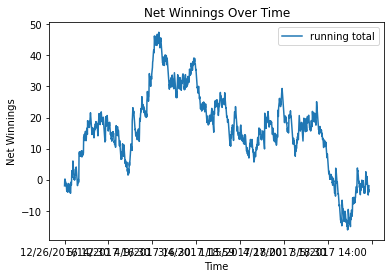

In [38]:
top_5_moving_df['bet_first_home'] = np.where(top_5_moving_df["final_result_x"] == '1', top_5_moving_df['home_team_odd_y']-1, -1)
print(top_5_moving_df['bet_first_home'].sum())
#so close
top_5_moving_df['running total'] = np.where(top_5_moving_df["final_result_x"] == '1', top_5_moving_df['bet_first_home'].cumsum()-1, top_5_moving_df['bet_first_home'].cumsum()-1)
top_5_moving_df.reset_index()

top_5_moving_df.plot.line(x='date_start_x_x', y='running total').set(title ="Net Winnings Over Time", xlabel= 'Time', ylabel = 'Net Winnings')

In [25]:
top_5_moving_df['home_odd_drop'] = np.where(top_5_moving_df["home_team_odd_x"] < top_5_moving_df["home_team_odd_y"], True, False)
top_5_moving_df['home_odd_drop'].value_counts()

True     1333
False      53
Name: home_odd_drop, dtype: int64